In [9]:
#Import Required Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


In [10]:
#  Load Sample Dataset

url = "https://raw.githubusercontent.com/dD2405/Twitter_Sentiment_Analysis/master/train.csv"
df = pd.read_csv(url)
df = df[['label', 'tweet']]  # Keep only relevant columns

# Preview
df.head()


,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation


In [11]:
#  Preprocessing
# Clean and encode
df['label'] = df['label'].map({0: 'Negative', 1: 'Positive'})

# Check for nulls
df.isnull().sum()


label    0
tweet    0
dtype: int64

In [12]:
# Split Dataset
X = df['tweet']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [13]:
#  TF-IDF Vectorization
tfidf = TfidfVectorizer(stop_words='english', max_df=0.7)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)


In [14]:
# Train Logistic Regression Model
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)


LogisticRegression()

In [15]:
#  Make Predictions
y_pred = model.predict(X_test_tfidf)


Accuracy: 0.9479117785077429

Classification Report:
               precision    recall  f1-score   support

    Negative       0.95      1.00      0.97      5937
    Positive       0.91      0.30      0.45       456

    accuracy                           0.95      6393
   macro avg       0.93      0.65      0.71      6393
weighted avg       0.95      0.95      0.94      6393



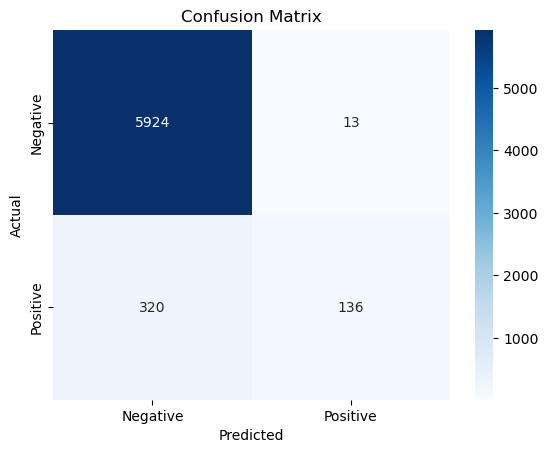

In [16]:
#   Evaluate Model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
